In [1]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [2]:
data_path = '/Users/deepak/Desktop/Data Science/Springboard/SB_Capstone2/data.json'

with open(data_path, 'r') as fp:
    data = json.load(fp)
    
X = np.array(data['MFCCs'])
y = np.array(data['labels'])

In [3]:
print('shape of X - {}'.format(X.shape))
print('shape of y - {}'.format(y.shape))

shape of X - (65511, 44, 13)
shape of y - (65511,)


In [4]:
random.seed(10)
test_size=0.2
validation_size=0.2
    
# create train, validation, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

In [5]:
print('shape of x train - {}'.format(X_train.shape))
print('shape of x validation - {}'.format(X_validation.shape))
print('shape of y train - {}'.format(y_train.shape))
print('shape of y validation - {}'.format(y_validation.shape))
print('\nUnique Labels - {}'.format((set(y_train))))

shape of x train - (41926, 44, 13)
shape of x validation - (10482, 44, 13)
shape of y train - (41926,)
shape of y validation - (10482,)

Unique Labels - {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}


In [6]:
# add an axis to nd array
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]

In [7]:
print('shape of x train - {}'.format(X_train.shape))
print('shape of x validation - {}'.format(X_validation.shape))
print('shape of x test - {}'.format(X_test.shape))

shape of x train - (41926, 44, 13, 1)
shape of x validation - (10482, 44, 13, 1)
shape of x test - (13103, 44, 13, 1)


In [8]:
EPOCHS = 40
BATCH_SIZE = 32   # This is the mini batch size 
PATIENCE = 5
learning_rate = 0.0001
    
        
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
    
    
# build network architecture using convolutional layers
model = tf.keras.models.Sequential()

# 1st conv layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

# 2nd conv layer
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

# 3rd conv layer
model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

# flatten output and feed into dense layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
tf.keras.layers.Dropout(0.3)

# softmax output layer - since we predict more than one outcome, we use softmax
model.add(tf.keras.layers.Dense(31, activation='softmax'))

optimiser = tf.optimizers.Adam(learning_rate=learning_rate)

# compile model
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


# print model parameters on console
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 11, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 42, 11, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 6, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 4, 32)         18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 4, 32)         128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 2, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 1, 32)          4

In [9]:
checkpoint_filepath = '/Users/deepak/Desktop/'

#earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.001, patience=5)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = model.fit(X_train,y_train,epochs=40,batch_size=32,validation_data=(X_validation, y_validation),callbacks=[model_checkpoint_callback])
history

Epoch 1/40
1311/1311 [==============================] - 50s 38ms/step - loss: 2.9346 - accuracy: 0.2206 - val_loss: 2.1234 - val_accuracy: 0.4441
Epoch 2/40
1311/1311 [==============================] - 46s 35ms/step - loss: 1.7360 - accuracy: 0.5395 - val_loss: 1.3547 - val_accuracy: 0.6417
Epoch 3/40
1311/1311 [==============================] - 46s 35ms/step - loss: 1.2190 - accuracy: 0.6759 - val_loss: 1.0281 - val_accuracy: 0.7290
Epoch 4/40
1311/1311 [==============================] - 45s 35ms/step - loss: 0.9748 - accuracy: 0.7417 - val_loss: 0.8708 - val_accuracy: 0.7747
Epoch 5/40
1311/1311 [==============================] - 46s 35ms/step - loss: 0.8357 - accuracy: 0.7806 - val_loss: 0.8100 - val_accuracy: 0.7832
Epoch 6/40
1311/1311 [==============================] - 45s 34ms/step - loss: 0.7399 - accuracy: 0.8070 - val_loss: 0.7148 - val_accuracy: 0.8164
Epoch 7/40
1311/1311 [==============================] - 45s 34ms/step - loss: 0.6751 - accuracy: 0.8232 - val_loss: 0.6429 -

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss: {}, test accuracy: {}'.format(test_loss, 100*test_acc))

410/410 [==============================] - 2s 6ms/step - loss: 0.3989 - accuracy: 0.9032
Test loss: 0.3989477753639221, test accuracy: 90.32282829284668


In [11]:
# Predictions
predictions = model.predict_classes(X_test)
predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([24,  1, 11, ..., 17, 25, 27])

In [12]:
# Saving X_train, y_train, X_test, X_validation, y_validation, y_test, predictions
X_train.dump('/Users/deepak/Desktop/Data Science/Springboard/SB_Capstone2/X_train.dat')
y_train.dump('/Users/deepak/Desktop/Data Science/Springboard/SB_Capstone2/y_train.dat')
X_test.dump('/Users/deepak/Desktop/Data Science/Springboard/SB_Capstone2/X_test.dat')
X_validation.dump('/Users/deepak/Desktop/Data Science/Springboard/SB_Capstone2/X_validation.dat') 
y_validation.dump('/Users/deepak/Desktop/Data Science/Springboard/SB_Capstone2/y_validation.dat')

df_y_test_pred = pd.DataFrame({'y_test': y_test, 'predictions': predictions})
df_y_test_pred.to_csv('/Users/deepak/Desktop/Data Science/Springboard/SB_Capstone2/y_test_&_predictions.csv')

In [13]:
SAVED_MODEL_PATH = '/Users/deepak/Desktop/Data Science/Springboard/SB_Capstone2/model.h5'
model.save(SAVED_MODEL_PATH)

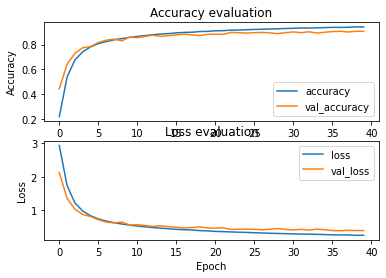

In [14]:
fig, axs = plt.subplots(2)

# create accuracy subplot
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[0].set_title('Accuracy evaluation')

# create loss subplot
axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].set_title('Loss evaluation')

plt.show()
